In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


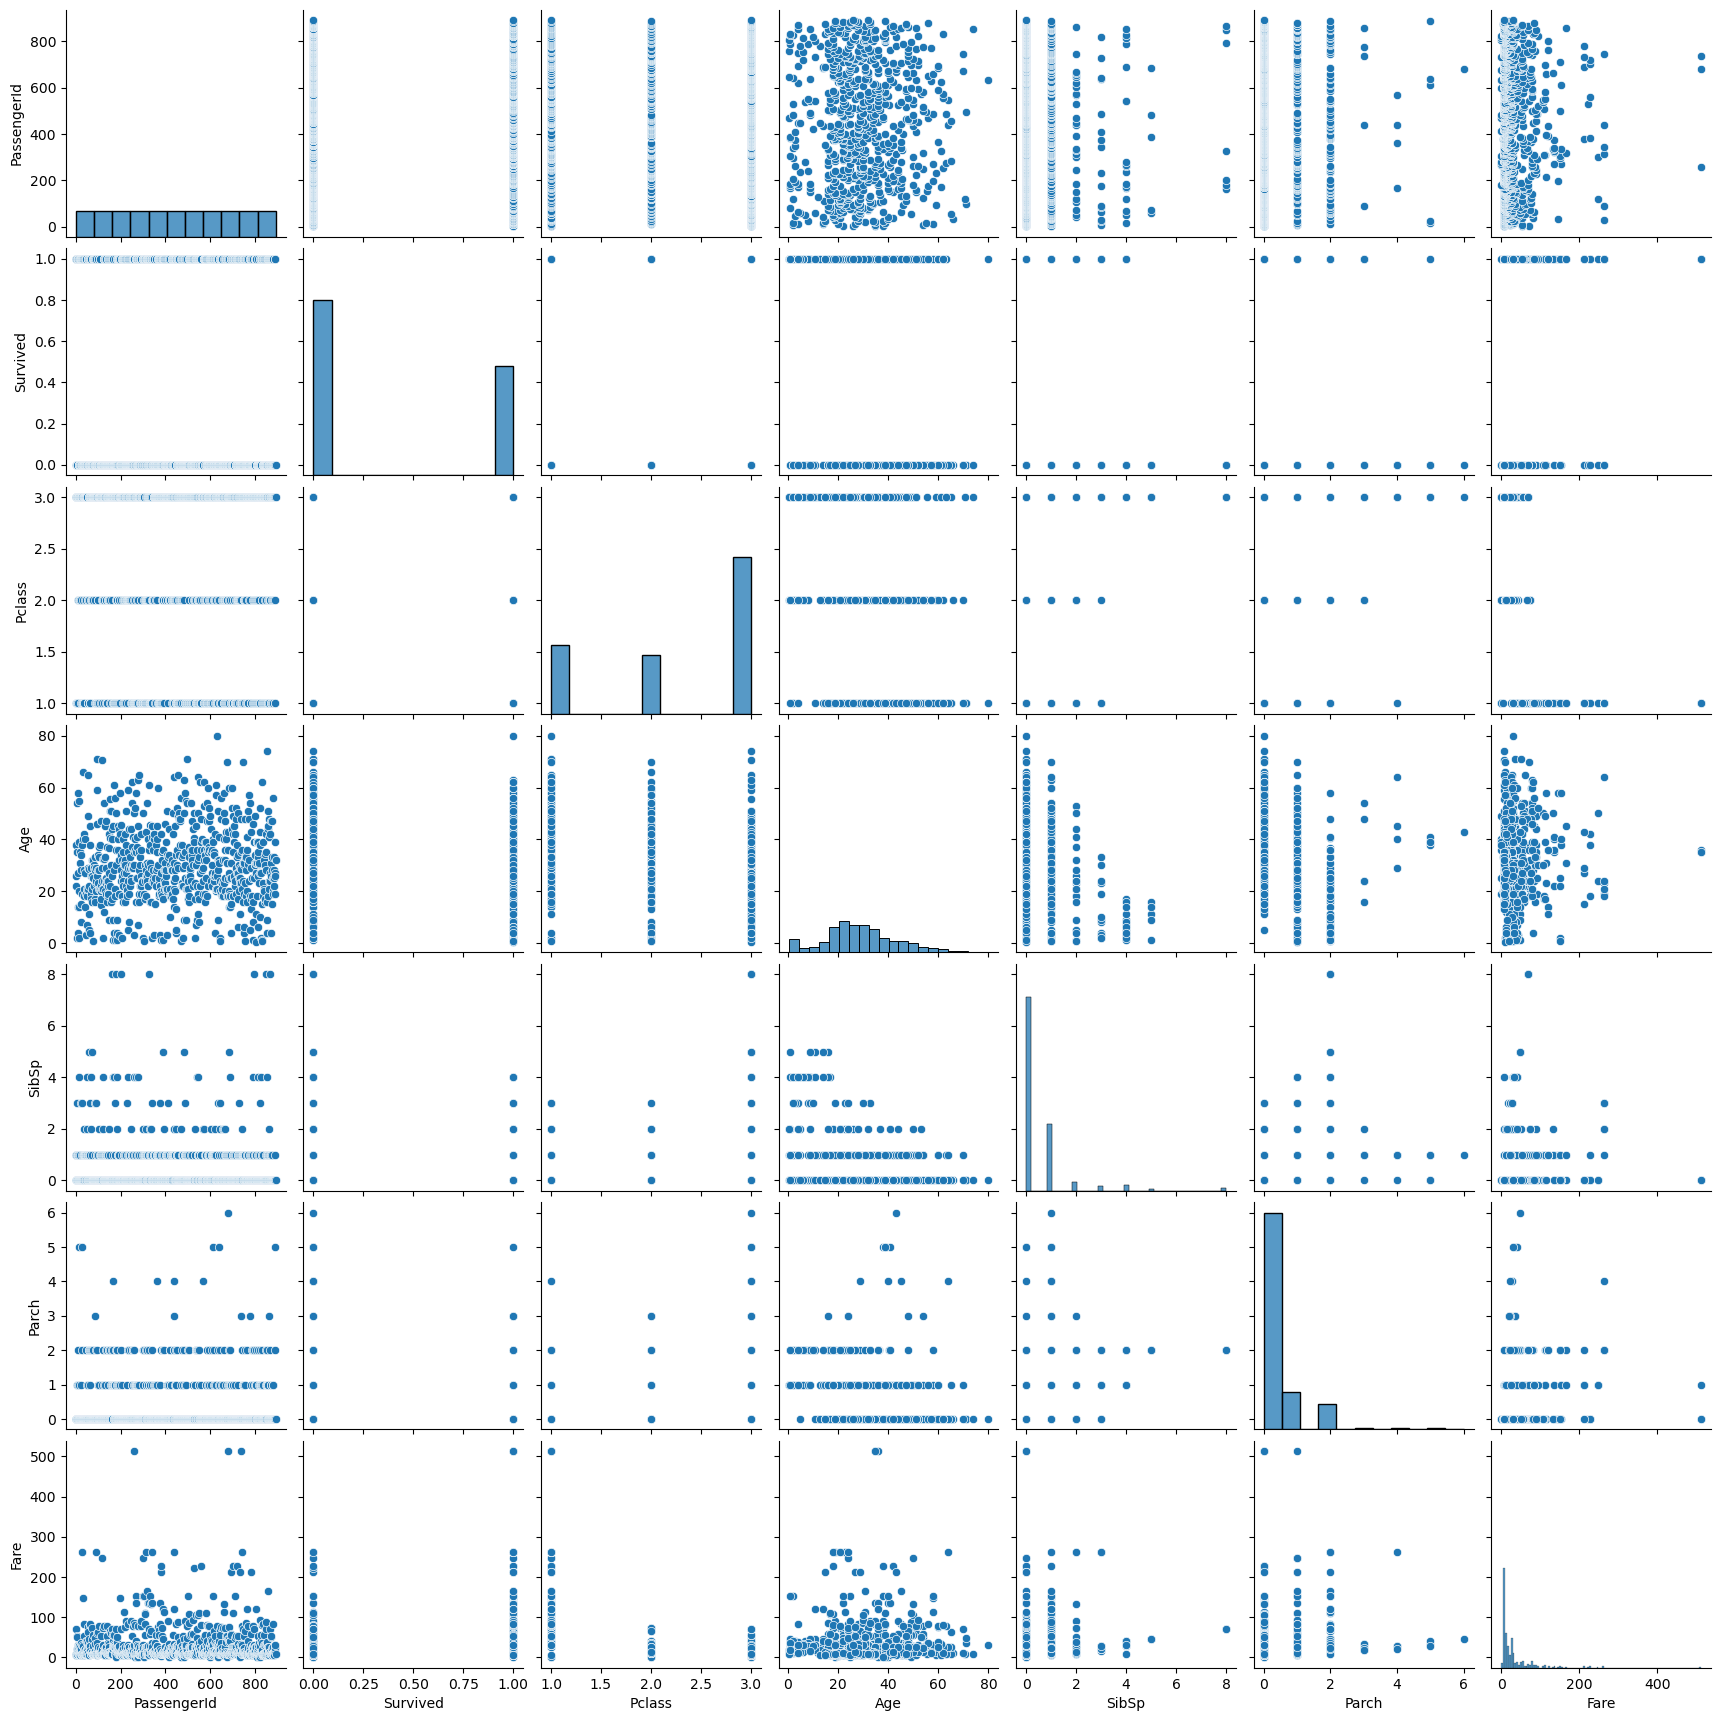

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,NaN,23.4500,S
889,1,1,male,26.0,30.0000,C


In [8]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.338481,-0.077221,0.257307
Pclass,-0.338481,1.000000,-0.369226,-0.549500
Age,-0.077221,-0.369226,1.000000,0.096067
Fare,0.257307,-0.549500,0.096067,1.000000


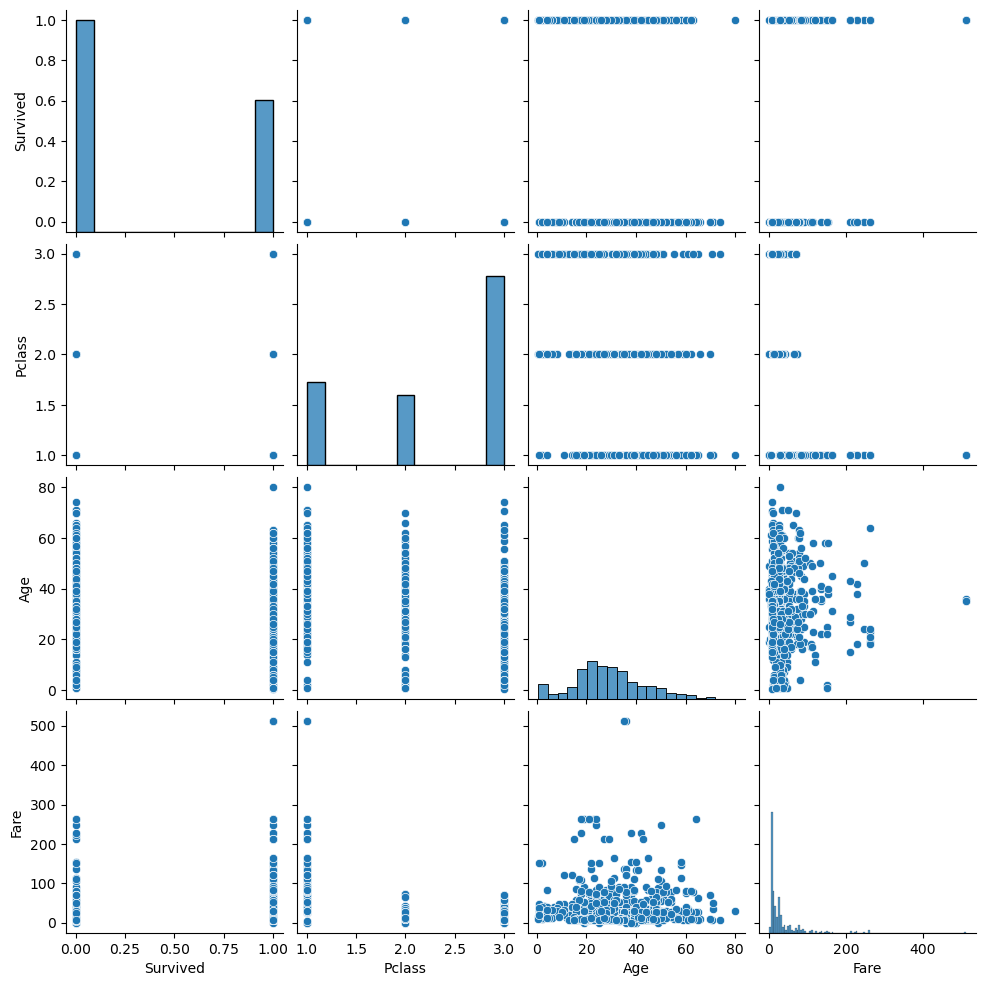

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,28.0,23.4500,S
889,1,1,male,26.0,30.0000,C


In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
888,0,3,female,28.0,23.4500,S
889,1,1,male,26.0,30.0000,C


In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [16]:
df.duplicated().sum()

125

In [17]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [18]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
761,0,3,female,39.0,29.1250,Q
762,1,1,female,19.0,30.0000,S
763,0,3,female,28.0,23.4500,S
764,1,1,male,26.0,30.0000,C


In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...
761,0,3,39.0,29.1250,0,1,0
762,1,1,19.0,30.0000,0,0,1
763,0,3,28.0,23.4500,0,0,1
764,1,1,26.0,30.0000,1,0,0


In [21]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [22]:
X

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
761,3,39.0,29.1250,0,1,0
762,1,19.0,30.0000,0,0,1
763,3,28.0,23.4500,0,0,1
764,1,26.0,30.0000,1,0,0


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [25]:
X_train

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
589,3,28.00,8.1375,0,1,0
417,1,56.00,26.5500,1,0,1
312,1,24.00,263.0000,0,0,1
568,3,32.00,15.5000,0,1,0
448,2,33.00,26.0000,0,0,1
...,...,...,...,...,...,...
419,3,0.75,19.2583,0,0,0
120,3,33.00,7.8958,1,0,0
368,3,51.00,7.7500,1,0,1
48,3,18.00,17.8000,0,0,1


In [26]:
logi = LogisticRegression()
logi.fit(X_train,y_train)
ypred_train = logi.predict(X_train)
ypred_test = logi.predict(X_test)
print('Training_accuracy:',accuracy_score(y_train,ypred_train))
print('Test_accuracy:',accuracy_score(y_test,ypred_test))
print('Cross Validation Score:',cross_val_score(logi,X,y,cv=5).mean())

Training_accuracy: 0.7630718954248366
Test_accuracy: 0.8116883116883117
Cross Validation Score: 0.7663356251591545


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[76, 14],
       [15, 49]], dtype=int64)

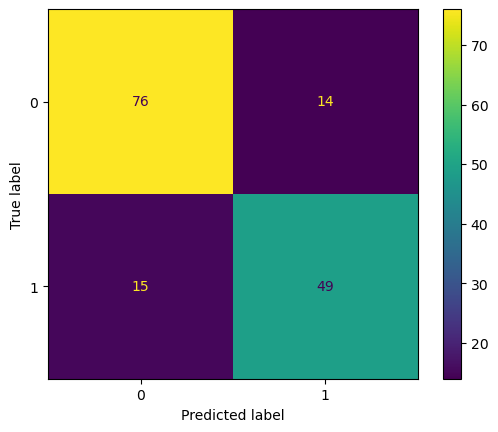

In [28]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logi,X_test,y_test)
plt.show()

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        90
           1       0.78      0.77      0.77        64

    accuracy                           0.81       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.81      0.81      0.81       154



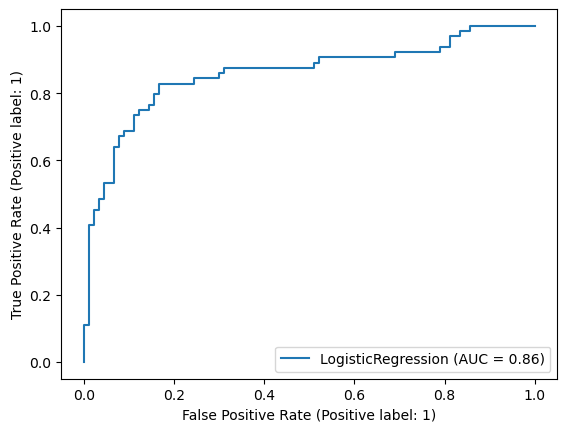

In [30]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logi,X_test,y_test)
plt.show()

In [31]:
df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...
761,0,3,39.0,29.1250,0,1,0
762,1,1,19.0,30.0000,0,0,1
763,0,3,28.0,23.4500,0,0,1
764,1,1,26.0,30.0000,1,0,0


In [32]:
X

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,1,0,1
1,1,38.0,71.2833,0,0,0
2,3,26.0,7.9250,0,0,1
3,1,35.0,53.1000,0,0,1
4,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...
761,3,39.0,29.1250,0,1,0
762,1,19.0,30.0000,0,0,1
763,3,28.0,23.4500,0,0,1
764,1,26.0,30.0000,1,0,0


In [33]:
X_train

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
589,3,28.00,8.1375,0,1,0
417,1,56.00,26.5500,1,0,1
312,1,24.00,263.0000,0,0,1
568,3,32.00,15.5000,0,1,0
448,2,33.00,26.0000,0,0,1
...,...,...,...,...,...,...
419,3,0.75,19.2583,0,0,0
120,3,33.00,7.8958,1,0,0
368,3,51.00,7.7500,1,0,1
48,3,18.00,17.8000,0,0,1


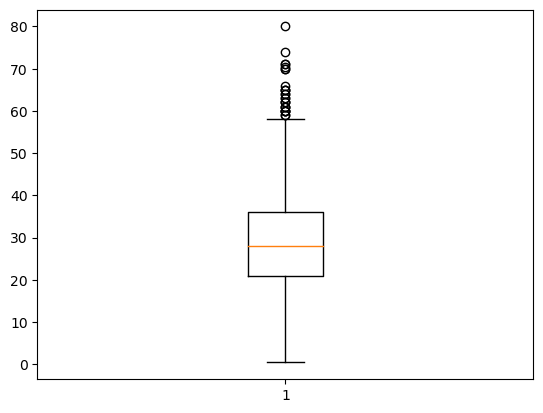

In [34]:
plt.boxplot(df['Age'])
plt.show()

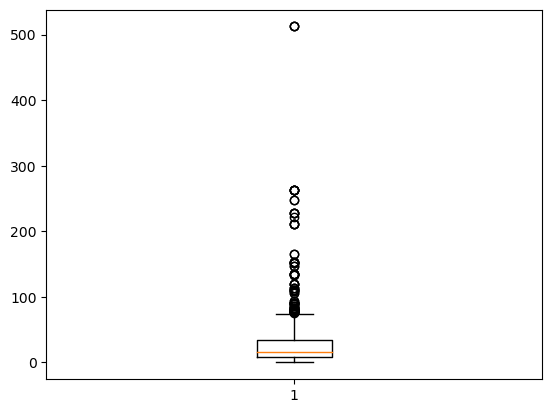

In [35]:
plt.boxplot(df['Fare'])
plt.show()

In [36]:
from feature_engine.outliers import Winsorizer

In [37]:
win = Winsorizer(capping_method='iqr',tail='both',fold=1.5)

In [38]:
df['Age'] = win.fit_transform(df[['Age']])
df['Fare'] = win.fit_transform(df[['Fare']])

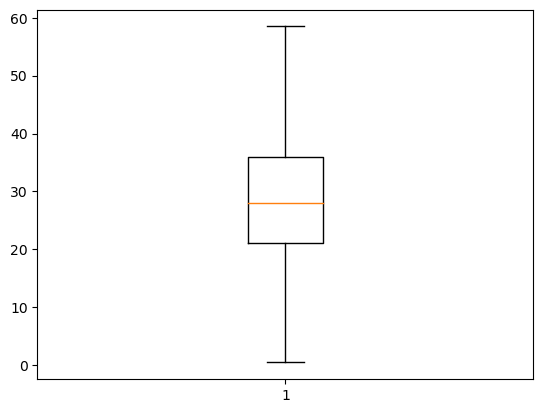

In [39]:
plt.boxplot(df['Age'])
plt.show()

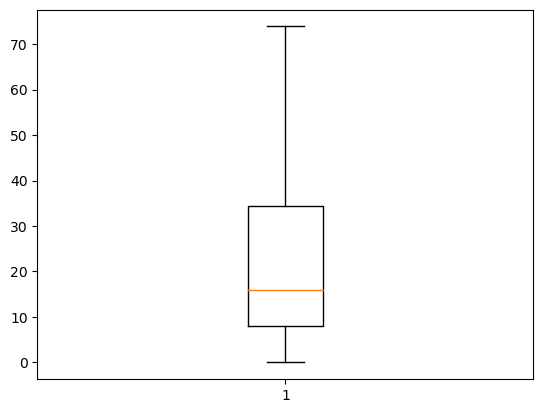

In [40]:
plt.boxplot(df['Fare'])
plt.show()

In [41]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [42]:
X = pd.get_dummies(X,drop_first=True)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [44]:
X_train

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
589,3,28.00,8.1375,0,1,0
417,1,56.00,26.5500,1,0,1
312,1,24.00,73.8625,0,0,1
568,3,32.00,15.5000,0,1,0
448,2,33.00,26.0000,0,0,1
...,...,...,...,...,...,...
419,3,0.75,19.2583,0,0,0
120,3,33.00,7.8958,1,0,0
368,3,51.00,7.7500,1,0,1
48,3,18.00,17.8000,0,0,1


In [45]:
logi1 = LogisticRegression()
logi1.fit(X_train,y_train)
ypred_train = logi1.predict(X_train)
ypred_test = logi1.predict(X_test)
print('Training_accuracy:',accuracy_score(y_train,ypred_train))
print('Test_accuracy:',accuracy_score(y_test,ypred_test))
print('Cross Validation Score:',cross_val_score(logi1,X,y,cv=5).mean())

Training_accuracy: 0.761437908496732
Test_accuracy: 0.8181818181818182
Cross Validation Score: 0.7650284356166709


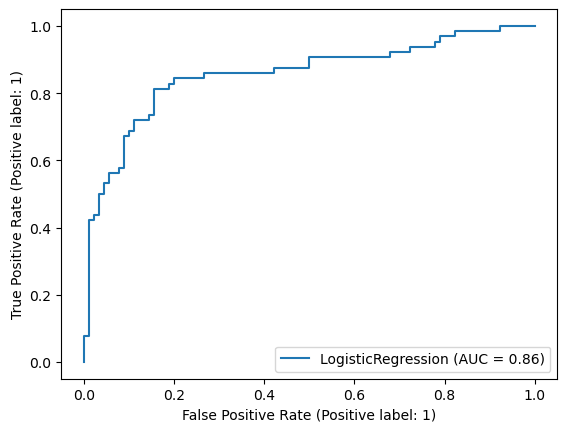

In [46]:
plot_roc_curve(logi1,X_test,y_test)
plt.show()

In [47]:
df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...
761,0,3,39.0,29.1250,0,1,0
762,1,1,19.0,30.0000,0,0,1
763,0,3,28.0,23.4500,0,0,1
764,1,1,26.0,30.0000,1,0,0


In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
logi2 = LogisticRegression()
logi2.fit(X_train,y_train)
ypred_train = logi2.predict(X_train)
ypred_test = logi2.predict(X_test)
print('Training_accuracy:',accuracy_score(y_train,ypred_train))
print('Test_accuracy:',accuracy_score(y_test,ypred_test))
print('Cross Validation Score:',cross_val_score(logi2,X,y,cv=5).mean())

Training_accuracy: 0.7647058823529411
Test_accuracy: 0.8051948051948052
Cross Validation Score: 0.7650284356166709


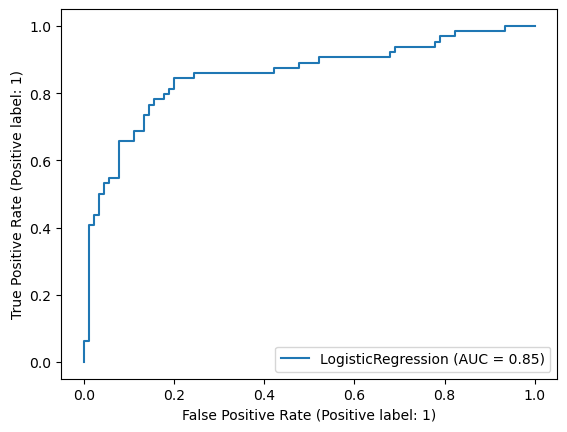

In [51]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logi2,X_test,y_test)
plt.show()

In [52]:
df['Age'].skew()

0.2025714212998857

In [53]:
df['Fare'].skew()

1.0984687270303022

In [54]:
df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1
...,...,...,...,...,...,...,...
761,0,3,39.0,29.1250,0,1,0
762,1,1,19.0,30.0000,0,0,1
763,0,3,28.0,23.4500,0,0,1
764,1,1,26.0,30.0000,1,0,0


In [55]:
df['Fare'].min()

0.0

In [56]:
from scipy.stats import boxcox
df['Fare1'],param = boxcox(df['Fare']+0.00001)
df['Fare1'].skew()

0.07613755267718898

In [57]:
df

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Fare1
0,0,3,22.0,7.2500,1,0,1,2.723488
1,1,1,38.0,71.2833,0,0,0,8.789525
2,1,3,26.0,7.9250,0,0,1,2.888930
3,1,1,35.0,53.1000,0,0,1,7.750613
4,0,3,35.0,8.0500,1,0,1,2.918483
...,...,...,...,...,...,...,...,...
761,0,3,39.0,29.1250,0,1,0,5.900985
762,1,1,19.0,30.0000,0,0,1,5.984404
763,0,3,28.0,23.4500,0,0,1,5.312691
764,1,1,26.0,30.0000,1,0,0,5.984404


In [58]:
df.drop('Fare1',axis=1,inplace=True)

In [59]:
df['Fare'],param = boxcox(df['Fare']+0.00001)

In [60]:
df['Fare'].skew()

0.07613755267718898

In [61]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [62]:
X = pd.get_dummies(X,drop_first=True)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [64]:
X_train

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
589,3,28.00,2.938981,0,1,0
417,1,56.00,5.644936,1,0,1
312,1,24.00,8.921367,0,0,1
568,3,32.00,4.291706,0,1,0
448,2,33.00,5.588031,0,0,1
...,...,...,...,...,...,...
419,3,0.75,4.810933,0,0,0
120,3,33.00,2.881980,1,0,0
368,3,51.00,2.847007,1,0,1
48,3,18.00,4.618610,0,0,1


In [65]:
logi3 = LogisticRegression()
logi3.fit(X_train,y_train)
ypred_train = logi3.predict(X_train)
ypred_test = logi3.predict(X_test)
print('Training_accuracy:',accuracy_score(y_train,ypred_train))
print('Test_accuracy:',accuracy_score(y_test,ypred_test))
print('Cross Validation Score:',cross_val_score(logi3,X,y,cv=5).mean())

Training_accuracy: 0.761437908496732
Test_accuracy: 0.8116883116883117
Cross Validation Score: 0.7585179526355997


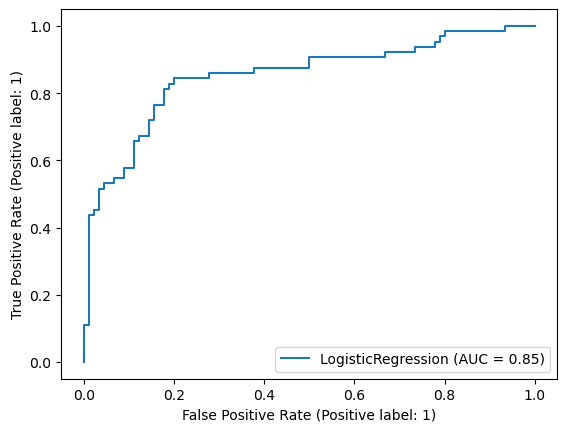

In [66]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logi3,X_test,y_test)
plt.show()